In [16]:
from a_movie_scraper import *

mov_df1 = scrape_most_popular_movies_IMDB()
mov_df1 = mov_df1.drop_duplicates(subset='Title')
mov_df1.to_csv(CSV_PATH+"mov_df1.csv")
print("Scrape data for most popular movies IMDb")
print(mov_df1)


Scrape data for most popular movies IMDb
                                            Title Rating Vote_count
0                                        Saltburn    7.1       118K
1                                     Poor Things    8.4        28K
2                             Society of the Snow    7.9        46K
3                                      Mean Girls    6.4       4.3K
4                                       12th Fail    9.2        78K
..                                            ...    ...        ...
65                              Top Gun: Maverick    7.0       224K
66                       The Shawshank Redemption    6.0       9.5K
67              Everything Everywhere All at Once    8.7         2M
68                                     The Killer    7.8       762K
69  Mission: Impossible - Dead Reckoning Part One    7.7       318K

[69 rows x 3 columns]


In [17]:
mov_df2 = scrape_most_popular_movies_rotten_tomatoes()
print("Scrape data for most popular movies Rotten Tomatoes")
print(mov_df2)
mov_df2.to_csv(CSV_PATH+"mov_df2.csv")

Scrape data for most popular movies Rotten Tomatoes
                                       Title    Start_Date
0                        The Arc of Oblivion  Jan 16, 2024
1   Gurren Lagann the Movie: Childhood's End  Jan 16, 2024
2                                     I.S.S.  Jan 19, 2024
3                               Founders Day  Jan 19, 2024
4             Inside the Yellow Cocoon Shell  Jan 19, 2024
..                                       ...           ...
77                                  Saindhav  Jan 12, 2024
78                                   Colao 2  Jan 12, 2024
79                             Abraham Ozler  Jan 12, 2024
80                                Regardless  Jan 12, 2024
81                                    Aattam  Jan 12, 2024

[82 rows x 2 columns]


In [18]:
merged_data = join_two_df_by_SQL(mov_df1, mov_df2)
print("\nSQL join df1 and df2:")
print(merged_data)
merged_data.to_csv(CSV_PATH+"merged_data_by_title.csv")

Merged Data:
                                                Title Rating Vote_count  \
0                                            Saltburn    7.1       118K   
1                                         Poor Things    8.4        28K   
2                                          Mean Girls    6.4       4.3K   
3                                         Oppenheimer    8.4       599K   
4                                       The Holdovers    8.0        56K   
5                                      Anyone But You    6.6       9.4K   
6                          Killers of the Flower Moon    7.7       164K   
7                                       The Beekeeper    6.8       6.2K   
8                                            Napoleon    6.5        88K   
9                                               Wonka    7.3        63K   
10                                  Anatomy of a Fall    7.8        38K   
11                                             Barbie    6.9       463K   
12          

In [28]:
csv_file3 = os.path.normpath(CSV_PATH+"merged_data_by_title.csv")
data = pd.DataFrame(pd.read_csv(csv_file3))

data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data = data.dropna(subset=['Rating'])
source = ColumnDataSource(data)


In [29]:
output_notebook()

Loading BokehJS ...

In [31]:
p = figure(title="IMDb's moives shows on Rottentomatoes", y_axis_label='Movies',
               x_axis_label='Rating', y_range=data['Title'][::-1])

p.hbar(y='Title', right='Rating', height=0.7,
           source=source, line_color="white", color="blue")
hover = HoverTool()
hover.tooltips = [('Title', '@Title'), ('Rating', '@Rating'),
                    ('Vote Count', '@Vote_count'), ('Start Date', '@Start_Date')]
p.add_tools(hover)
show(p)

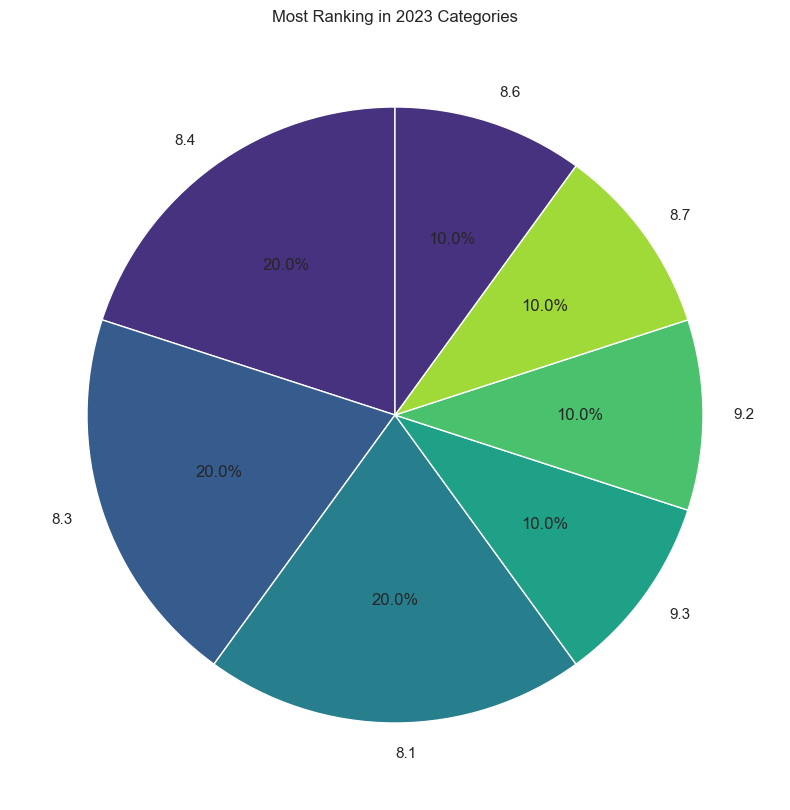

c:\Users\csath\Documents\CodeKentucky_homework\DA_Capstone_Project_2023\b_matplot_mov_df1.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=date_counts.index, y=date_counts.values, palette="viridis")


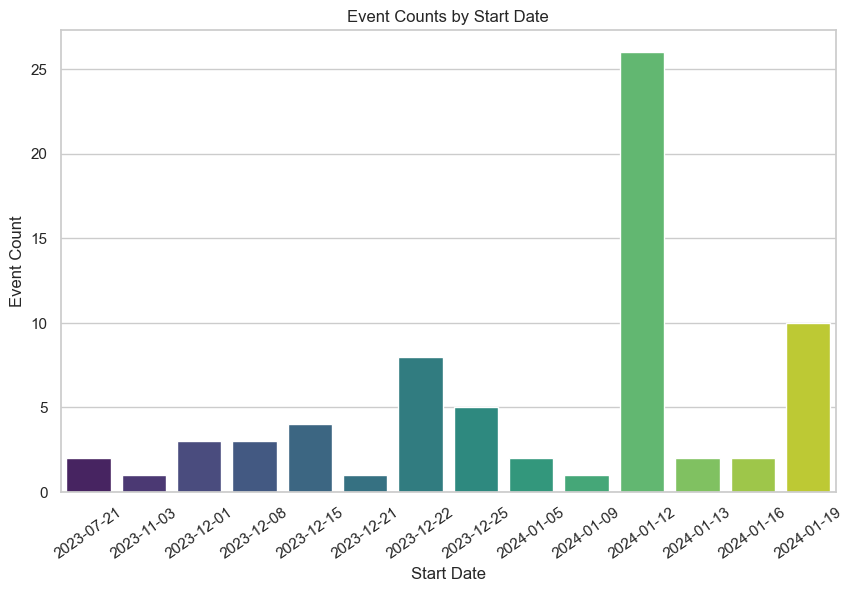

c:\Users\csath\Documents\CodeKentucky_homework\DA_Capstone_Project_2023\b_matplot_mov_df1.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Title", y="Rating", data=data, palette="viridis")


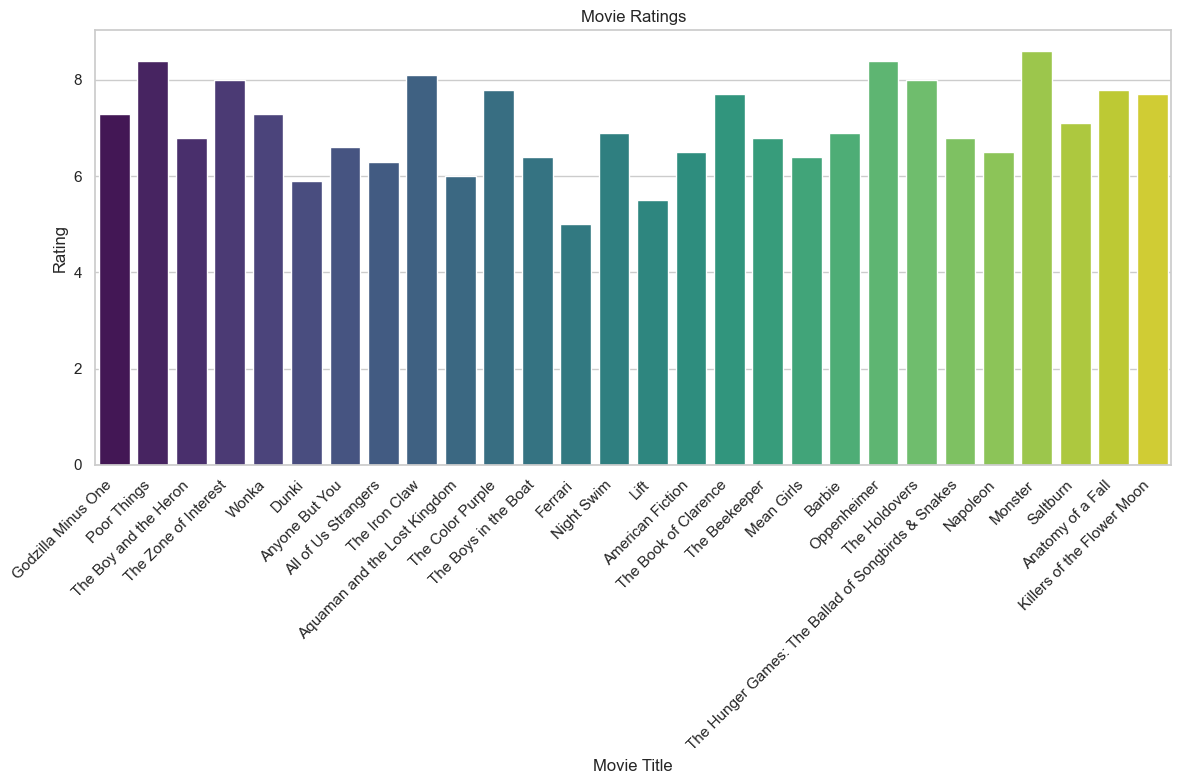

In [2]:
from b_matplot_mov_df1 import *

matplot_mov_df1()
matplot_mov_df2()
matplot_merged_data()